In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Introdução

### Objetivo: 

- Identificar o perfil dos clientes que dão churn
- Encontrar um padrão
- Criar insights sobre possíveis motivos
- Realizar o tratamento dos dados (pré-processamento)
- Testar modelos de predição

## EDA (Análise Exploratória)

In [6]:
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [23]:
churn = df.Exited.sum()/df.Exited.count()
churn

0.2037

### Churn por País

In [76]:
country = df.groupby('Geography').Exited.mean().reset_index()
country = country.sort_values(by= 'Exited', ascending=False)
country

,Geography,Exited
1,Germany,0.324432
2,Spain,0.166734
0,France,0.161548


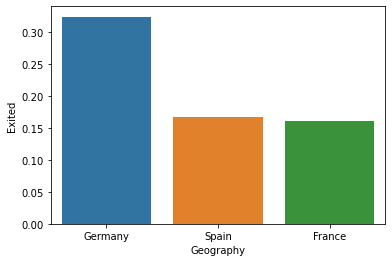

In [77]:
ax = sns.barplot(x='Geography', y='Exited', data=country)

Clientes alemães tem maior propensão a dar churn na empresa, já os franceses apresentam os menores riscos de cancelamento

### Churn por Gênero

In [81]:
gender = df.groupby('Gender').Exited.mean().reset_index()
gender

,Gender,Exited
0,Female,0.250715
1,Male,0.164559


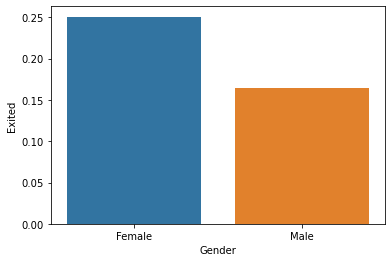

In [83]:
ax = sns.barplot(x='Gender', y='Exited', data=gender)

Clientes mulheres são mais propensas a darem churn na empresa

### Churn por Idade

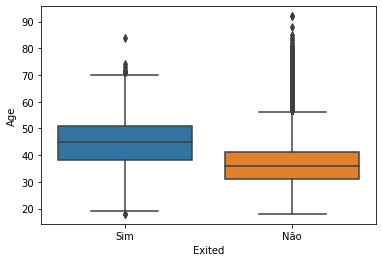

In [62]:
df.Exited = df.Exited.replace([1,0],['Sim', 'Não'])
ax = sns.boxplot(x='Exited', y='Age', data=df)

Clientes que dão churn tem idade média menor que 40 anos. Isto sugere que a população mais avançada tem menor propensão ao churn

### Churn por Score

In [3]:
df['score_cat'] = 'NaN'

for index, row in df.iterrows(): #criação de uma categorização referenciada pela coluna de Score
    if row['CreditScore'] <= 300:
        df.loc[index, 'score_cat'] = 'Low'
    else:
        if row['CreditScore'] > 300 and row['CreditScore'] <= 500:
            df.loc[index, 'score_cat'] = 'Regular'
        if row['CreditScore'] > 500 and row['CreditScore'] <= 700:
            df.loc[index, 'score_cat'] = 'Good'
        if row['CreditScore'] > 700 and row['CreditScore'] <= 1000:
            df.loc[index, 'score_cat'] = 'Very Good'
            
            
display(df)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_cat
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Good
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Good
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Good
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Good
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Very Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,Very Good
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,Good
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,Very Good
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,Very Good


In [4]:
df.score_cat.value_counts()

Good         6241
Very Good    3116
Regular       643
Name: score_cat, dtype: int64

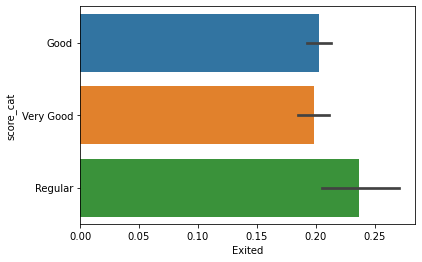

In [6]:
ax = sns.barplot(x='Exited', y='score_cat', data=df)

Inicialmente, podemos dizer que há uma proporcionalidade inversa entre os Churns e o nível do Score, porém como é visto no gráfico, essa relação não é fortee pode ser não significativa para a previsão. Porém pode=se constatar que score mais baixos tendem a ter mais chances de churn

### Churn por tempo de cliente

In [67]:
teste=df.groupby('Tenure').Exited.sum()
teste

Tenure
0      95
1     232
2     201
3     213
4     203
5     209
6     196
7     177
8     197
9     213
10    101
Name: Exited, dtype: int64

In [20]:
tenure = df.groupby('Tenure').Exited.mean().reset_index()
tenure.sort_values(by= 'Exited', ascending=False)

,Tenure,Exited
0,0,0.230024
1,1,0.224155
9,9,0.216463
3,3,0.211100
5,5,0.206522
10,10,0.206122
4,4,0.205258
6,6,0.202689
8,8,0.192195
2,2,0.191794


Temos que a maior probabilidade de Churn se dá nos clientes com menos de 1 ano de tempo, cerca de 23%

In [54]:
tenure_churn = df[df['Exited']==1]


In [55]:
churn = tenure_churn.groupby('Tenure').Exited.sum().reset_index()
total = churn['Exited'].sum()
churn['Exited'] = churn['Exited'] / total
# tenure_churn.sort_values(by= 'Exited', ascending=False)
churn.sort_values(by='Exited', ascending=False)

,Tenure,Exited
1,1,0.113893
3,3,0.104566
9,9,0.104566
5,5,0.102602
4,4,0.099656
2,2,0.098675
8,8,0.096711
6,6,0.096220
7,7,0.086892
10,10,0.049583


Analisando a relação dos clientes que deram Churn. Temos que a maior parcela dos Churn se dão nos estágios inciais de tempo com a empresa

### Churn por Saldo

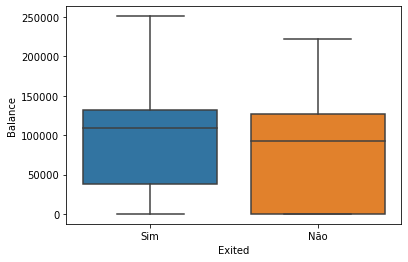

In [69]:
df.Exited = df.Exited.replace([1,0],['Sim', 'Não'])
ax = sns.boxplot(x='Exited', y='Balance', data=df)

Analisando o saldo, vemos que o as ocorrências de Churn são em sau maioria são de saldo maiores do que 5000. Ou seja, clienets com grandes saldos tem probabilidade maior de Churn

### Churn por cartão de crédito

In [84]:
df['CrCard_cat'] = df['HasCrCard'].replace([1,0], ['Sim', 'Não'])
card = df.groupby('CrCard_cat').Exited.mean().reset_index()
card


,CrCard_cat,Exited
0,Não,0.208149
1,Sim,0.201843


<AxesSubplot:xlabel='CrCard_cat', ylabel='Exited'>

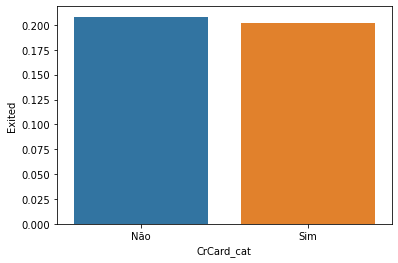

In [86]:
sns.barplot(x='CrCard_cat', y='Exited', data=card)

Nota-se que a probabilidade de Churn é levemente maior em clientes que não possuem cartão de crédito

### Churn por membro ativo

In [87]:
df['Member_cat'] = df['IsActiveMember'].replace([1,0], ['Sim', 'Não'])
member = df.groupby('Member_cat').Exited.mean().reset_index()
member

,Member_cat,Exited
0,Não,0.268509
1,Sim,0.142691


<AxesSubplot:xlabel='Member_cat', ylabel='Exited'>

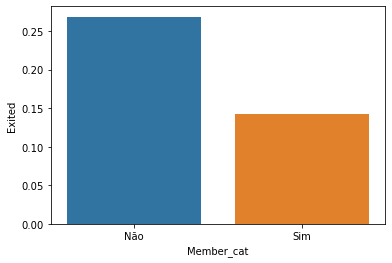

In [89]:
sns.barplot(x='Member_cat', y='Exited', data=member)

Nota-se que, naturalmente, membro não ativos tendem a dar Churn mais do que os membros ativos

### Churn por número de produtos

<AxesSubplot:xlabel='NumOfProducts', ylabel='Exited'>

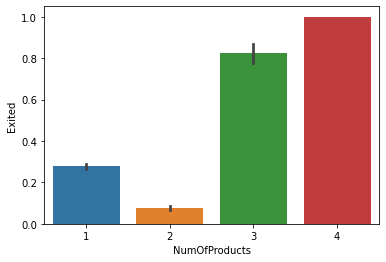

In [3]:
sns.barplot(x='NumOfProducts', y = 'Exited', data=df)

Nota-se que clientes que possuem mais de 2 produtos tendem a dar mais Churn 

### Churn por Renda

<AxesSubplot:xlabel='Exited_cat', ylabel='EstimatedSalary'>

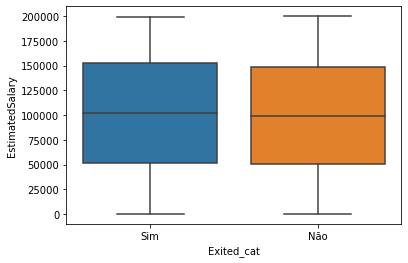

In [6]:
df['Exited_cat'] = df['Exited'].replace([1,0], ['Sim', 'Não'])
sns.boxplot(x='Exited_cat', y='EstimatedSalary', data=df)

Nota-se que 50% dos Churns são de clientes que ganham mais de R$10000,00. Ou seja, podemos concluir que clientes com alta renda tem maior probabilidade de sair da empresa

In [7]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Exited_cat
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Sim
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Não
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Sim
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Não
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Não
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,Não
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,Não
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,Sim
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,Sim


### Constatações e Insights

Com a EDA, foi possível traçar um perfil de cliente que possui maior probabilidade de dar Churn:
- Gênero feminino
- Alemão
- Entre 40 e 50 anos
- Score baixo 
- Cliente recente (por volta de 1 ano)
- Saldo a partir de RS 5000,00
- Não possui cartão de crédito
- É um membro inativo
- Possui mais de 2 produtos do banco
- Renda maior do que RS 10000,00

A partir disto, é possível elaborar alguns planos de melhorias, como por exemplo:
- Campanhas e incentivos para mulheres de modo a minimizar sua saída (estratégias de MKT)
- Estudar o compartamento de consumo e aquisição de serviço do cliente por país para que se entenda o cenário de atuação em cada país, se as práticas da empresa são compatíveis com os interesses locais, o nível de concorrência, quadros políticos e econômicos. Deste modo será possível personalizar o atendimento e operação em cada país 
- Investir na aquisição de clientes com scores mais altos de modo a garantir estabilidade ou então criar incentivos que prolonguem o LTV de clientes que possuem scores baixos
- Promover incentivos  de modo a prender o cliente por mais de 1 ano
- Facilitar cartões de crédito com baixos limites a clientes de score baixo e facilitar o aumento do limite para clientes de alto score



In [8]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Exited_cat
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Sim
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Não
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Sim
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Não
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Não
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,Não
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,Não
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,Sim
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,Sim


In [7]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


<AxesSubplot:>

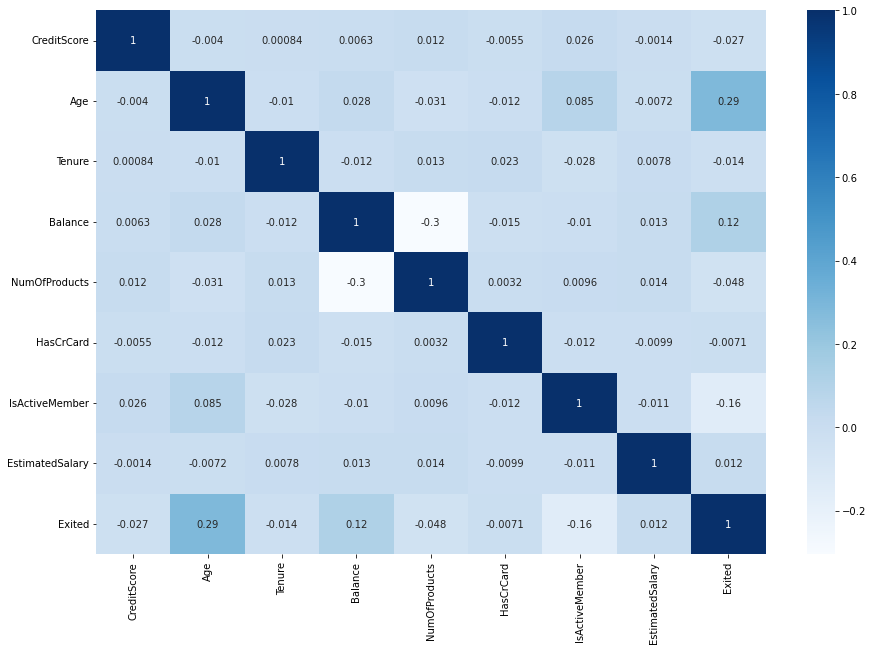

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='Blues')


In [20]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [8]:
colunas_cat = ['Geography', 'Gender']

df = pd.get_dummies(data= df, columns=colunas_cat)

df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [22]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


## Modelo

### LogisticRegression 

In [31]:
X=df.drop('Exited', axis=1)
y=df.Exited

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [33]:
y_train.shape

(7000,)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedKFold

- Validação

In [36]:
resultados=[]

kf=RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for linhas_treino, linhas_valid in kf.split(X_train):
    print('Treino: ', linhas_treino.shape[0])
    print('Valid: ', linhas_valid.shape[0])

    X_train2, X_valid = X_train.iloc[linhas_treino], X_train.iloc[linhas_valid]
    y_train2, y_valid = y_train.iloc[linhas_treino], y_train.iloc[linhas_valid]

    modelo = LogisticRegression()
    modelo.fit(X_train2, y_train2)

    p = modelo.predict(X_valid)
    acc = np.mean(y_valid == p)
    resultados.append(acc)
    print("Acc: ", acc)

Treino:  3500
Valid:  3500
Acc:  0.79
Treino:  3500
Valid:  3500
Acc:  0.786
Treino:  3500
Valid:  3500
Acc:  0.786
Treino:  3500
Valid:  3500
Acc:  0.7945714285714286
Treino:  3500
Valid:  3500
Acc:  0.7894285714285715
Treino:  3500
Valid:  3500
Acc:  0.7914285714285715
Treino:  3500
Valid:  3500
Acc:  0.7951428571428572
Treino:  3500
Valid:  3500
Acc:  0.7857142857142857
Treino:  3500
Valid:  3500
Acc:  0.79
Treino:  3500
Valid:  3500
Acc:  0.7908571428571428
Treino:  3500
Valid:  3500
Acc:  0.7871428571428571
Treino:  3500
Valid:  3500
Acc:  0.7937142857142857
Treino:  3500
Valid:  3500
Acc:  0.7914285714285715
Treino:  3500
Valid:  3500
Acc:  0.7897142857142857
Treino:  3500
Valid:  3500
Acc:  0.7888571428571428
Treino:  3500
Valid:  3500
Acc:  0.7897142857142857
Treino:  3500
Valid:  3500
Acc:  0.7908571428571428
Treino:  3500
Valid:  3500
Acc:  0.7891428571428571
Treino:  3500
Valid:  3500
Acc:  0.7948571428571428
Treino:  3500
Valid:  3500
Acc:  0.7834285714285715


In [39]:
acc_mean = np.mean(resultados)

print(f'A acurácia no modelo de Regressão Logística para os dados de validação é: {acc_mean}')

A acurácia no modelo de Regressão Logística para os dados de validação é: 0.7899


- Teste

In [44]:
resultados2=[]

kf=RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for linhas_treino, linhas_teste in kf.split(X):
    print('Treino: ', linhas_treino.shape[0])
    print('Teste: ', linhas_teste.shape[0])

    X_train, X_test = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_train, y_test = y.iloc[linhas_treino], y.iloc[linhas_valid]

    modelo = LogisticRegression()
    modelo.fit(X_train, y_train)

    p = modelo.predict(X_test)
    acc = np.mean(y_test == p)
    resultados2.append(acc)
    print("Acc: ", acc)

Treino:  5000
Teste:  5000
Acc:  0.7825714285714286
Treino:  5000
Teste:  5000
Acc:  0.7814285714285715
Treino:  5000
Teste:  5000
Acc:  0.7868571428571428
Treino:  5000
Teste:  5000
Acc:  0.7811428571428571
Treino:  5000
Teste:  5000
Acc:  0.7811428571428571
Treino:  5000
Teste:  5000
Acc:  0.7828571428571428
Treino:  5000
Teste:  5000
Acc:  0.7811428571428571
Treino:  5000
Teste:  5000
Acc:  0.7814285714285715
Treino:  5000
Teste:  5000
Acc:  0.7831428571428571
Treino:  5000
Teste:  5000
Acc:  0.7814285714285715
Treino:  5000
Teste:  5000
Acc:  0.782
Treino:  5000
Teste:  5000
Acc:  0.7808571428571428
Treino:  5000
Teste:  5000
Acc:  0.7828571428571428
Treino:  5000
Teste:  5000
Acc:  0.7822857142857143
Treino:  5000
Teste:  5000
Acc:  0.7834285714285715
Treino:  5000
Teste:  5000
Acc:  0.7814285714285715
Treino:  5000
Teste:  5000
Acc:  0.7854285714285715
Treino:  5000
Teste:  5000
Acc:  0.7808571428571428
Treino:  5000
Teste:  5000
Acc:  0.7811428571428571
Treino:  5000
Teste:  500

In [45]:
acc_mean = np.mean(resultados2)

print(f'A acurácia no modelo de Regressão Logística para os dados de teste é: {acc_mean}')

A acurácia no modelo de Regressão Logística para os dados de teste é: 0.7823


### XGBoost

In [28]:
# contagem da classe alvo
contagem = df['Exited'].value_counts()
print(f"Cliente sem Churn: {contagem[0]}")
print(f"Cliente com Churn: {contagem[1]}")

Cliente sem Churn: 7963
Cliente com Churn: 2037


0 - Clientes sem Churn | 1 - Clientes com Churn



C:\Users\artur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


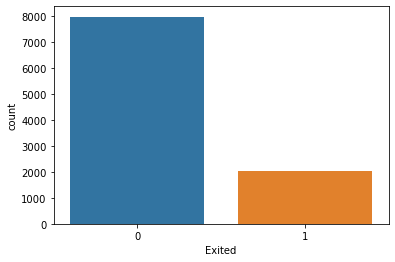

In [29]:
# plotar gráfico de barras para as Classes
sns.countplot('Exited', data=df);
print('0 - Clientes sem Churn | 1 - Clientes com Churn\n')

pelos resultados apresentados, podemos constatar que o nosso dataset está desbalanceado.

In [30]:
bal = df['Exited'].mean()
print(f'A porcentagem de clientes que deram Churn é de: {bal*100:.2f}%')

A porcentagem de clientes que deram Churn é de: 20.37%


In [31]:
df_copia = df.copy()

X=df_copia.drop('Exited', axis=1)
y=df_copia.Exited

In [32]:
# separando os dados de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    shuffle=True, 
                                                    random_state = 0)

# verificando a dimensão dos dados de treino e teste
print(f'Dados para Treino: {X_train.shape[0]} amostras')
print(f'Dados para Teste: {X_test.shape[0]} amostras')

Dados para Treino: 7000 amostras
Dados para Teste: 3000 amostras


In [33]:
! pip install xgboost

In [34]:
from IPython.core.display import display, HTML
from xgboost import XGBClassifier

In [35]:
clf = XGBClassifier(n_estimators = 650,
                    max_depth = 10, 
                    learning_rate = 0.01,
                    subsample = 1,
                    random_state=0)

# Training the XGB classifier
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=650,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [36]:
y_pred = clf.predict(X_test)
# Combinando os valores encontrados com os valores atuais
pd.DataFrame(data={'Rótulo Atual': y_test, 'Rótulo Predito': y_pred}).head()

,Rótulo Atual,Rótulo Predito
9394,0,0
898,1,0
2398,0,0
5906,0,0
2343,0,0


- Matriz de Confusão: verificação de erros do modelo para cálculo da acurácia

C:\Users\artur\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


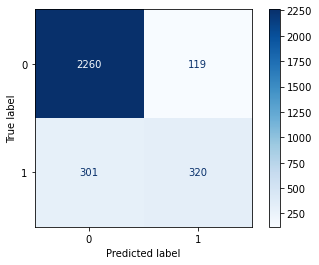

In [37]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test, cmap='Blues')

In [38]:
# Score da Acurácia
from sklearn.metrics import accuracy_score
print(f'Precisão do modelo: {round(accuracy_score(y_test, y_pred)*100,3)}%')

Precisão do modelo: 86.0%


In [39]:
# Relatório da Classificação
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2379
           1       0.73      0.52      0.60       621

    accuracy                           0.86      3000
   macro avg       0.81      0.73      0.76      3000
weighted avg       0.85      0.86      0.85      3000



*** Como os dados em que o modelo foi treinado estão desbalaceados, tudo nos leva a crer que as previsões tendem a ser de 0 (não ocorrer Churn). Farei um baleamento destes dados e repetirei o treinamento ***

In [21]:
# instala a biblioteca para balanceamento (método de oversampling)
! pip install --upgrade imbalanced-learn



In [22]:
# carrega a bibliotecas necessárias para a 2ª iteração
from imblearn.over_sampling import SMOTE
from collections import Counter

In [40]:
# executa o balanceamento usando a técnica SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# realiza a contagem das classes
contagem = Counter(y)
print(contagem)

Counter({1: 7963, 0: 7963})


In [41]:
# separando os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    shuffle=True, 
                                                    random_state = 0)

In [42]:
clf2 = XGBClassifier(n_estimators = 650,
                    max_depth = 10, 
                    learning_rate = 0.01,
                    subsample = 1,
                    random_state=0)

# Training the XGB classifier
clf2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=650,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [43]:
# fazendo a predição com os dados de teste
y_pred = clf2.predict(X_test)
# Cobinando os valores encontrados com os valores atuais
pd.DataFrame(data={'Rótulo Atual': y_test, 'Rótulo Predito': y_pred}).head()

,Rótulo Atual,Rótulo Predito
10878,1,1
13564,1,1
3959,1,1
12402,1,1
14151,1,0


C:\Users\artur\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


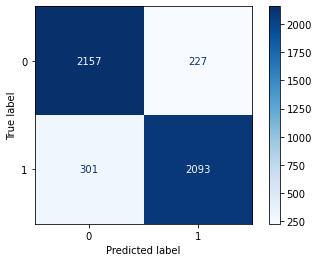

In [44]:
# apresentando os resultados pela Matriz de Confusão
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf2, X_test, y_test, cmap='Blues')

In [45]:
# Score da Acurácia
from sklearn.metrics import accuracy_score
print(f'Precisão do modelo : {round(accuracy_score(y_test, y_pred)*100,3)}%')

Precisão do modelo : 88.949%


In [46]:
# Relatório da Classificação
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      2384
           1       0.90      0.87      0.89      2394

    accuracy                           0.89      4778
   macro avg       0.89      0.89      0.89      4778
weighted avg       0.89      0.89      0.89      4778



Após o balanceamento, ficou clara a melhora no desempenho do modelo baseado no XGBoost